# Predicting heart disease using Machine Learning
+ This notebook looks into using various Python-based machine learning and data science 
  libraries in an attempt to build a machine learning model capable of predictiing whether or not 
  someone has heart disease based on their medical attributes  

#### Approach :

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling 
6. Experimentation

## 1. Problem Definition
In a Statement:
> Given clinical paramenters about a patient, we can predict whether or not they have heart disease or not?  

## 2. Data
The original data is from UCI machine learning repo and can also be found on kaggle https here
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart diease during the proof of concept, we'll pursue the project

## 4. Features
This is where you will get different information about each of the features in the data

**Create a data dictionary for the columns**




In [1]:
# Preparing the tools needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print('Heart Data - rows:' , df.shape[0],'columns:', df.shape[1])

Heart Data - rows: 303 columns: 14


# Exploratory Data Analysis
The goal is to find out more about the data and become a subject matter expert on the dataset we are working with.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different data types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data


In [5]:
# checking for % of missing values in our data
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,target,thal,ca,slope,oldpeak,exang,thalach,restecg,fbs,chol,trestbps,cp,sex,age
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))


There is 0 missing values in the dataframe


In [7]:
# Let's find out how many of each cases there are:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

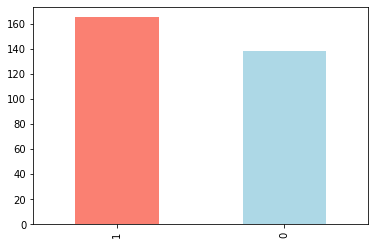

In [8]:
# Let's visualise our target variable
df["target"].value_counts().plot(kind="bar", color=['salmon','lightblue']);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# compare different column and figure out patterns

## Heart Disease according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


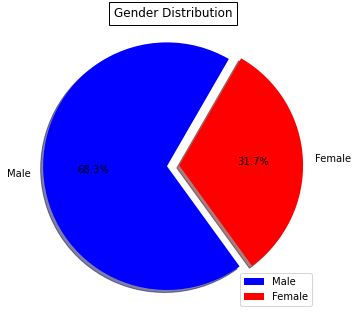

In [14]:
gender_val = ['Male','Female']
gender = df['sex'].value_counts()

gender = gender.astype(float)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('Gender Distribution' , bbox={'facecolor':'white','pad':5})
labels = 'Male','Female'
colors = ['blue' , 'red']
explode = (0.1 , 0)
plt.pie(gender ,explode =explode ,labels=labels ,colors =colors ,autopct = '%1.1f%%' ,shadow = True,startangle = 60)
plt.legend(labels = gender_val)
plt.axis('equal')
plt.show()

''

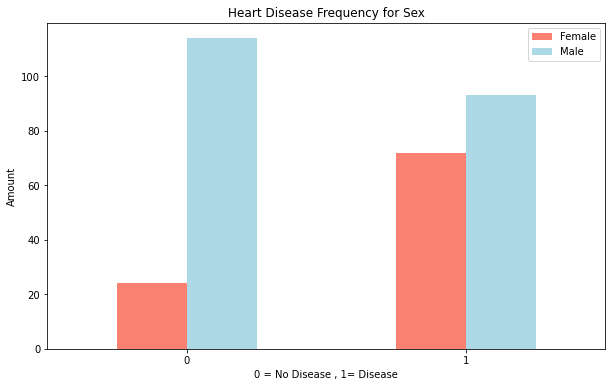

In [15]:
# create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
;

In [16]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [17]:
# Age vs MxnHeart rate for Heart disease

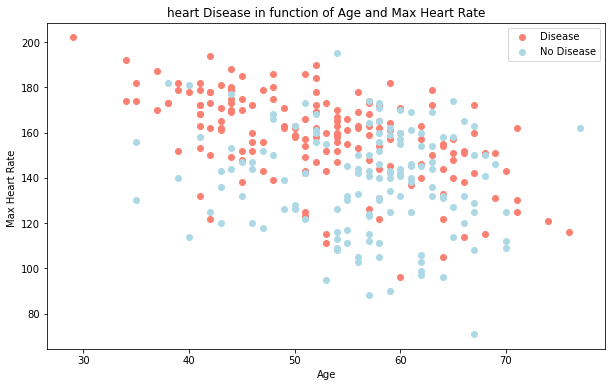

In [18]:
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='salmon')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='lightblue')

plt.title("heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate ")
plt.legend(["Disease","No Disease"])
plt.show()

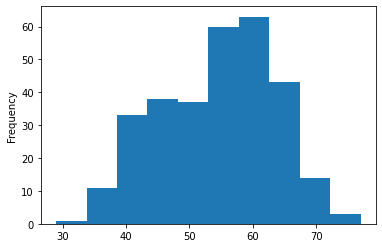

In [19]:
# Check the distribution of Age with a histogram
df.age.plot.hist();

# Heart disease Frequency per Chest pain Cp vs target
* Typical angina: chest pain realtd decrease blood supply to the heart
* Atypical angina: chest pain not related to heart
* Non-anginal pain: typically esophageal spasms(no-heart related)
* Asymptomatic: chest pain not showing signs of disease    

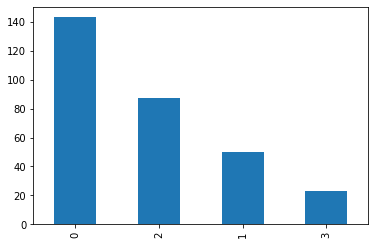

In [20]:
df.cp.value_counts().plot(kind='bar');

In [21]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


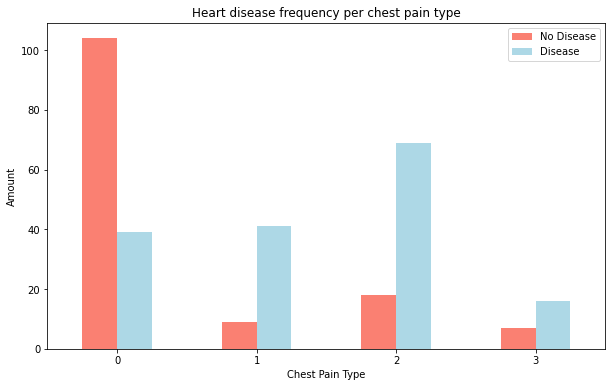

In [22]:
# Make visualisation
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [23]:
# Make a correlatio Matrix - correlation between dependent and independent variables

In [24]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


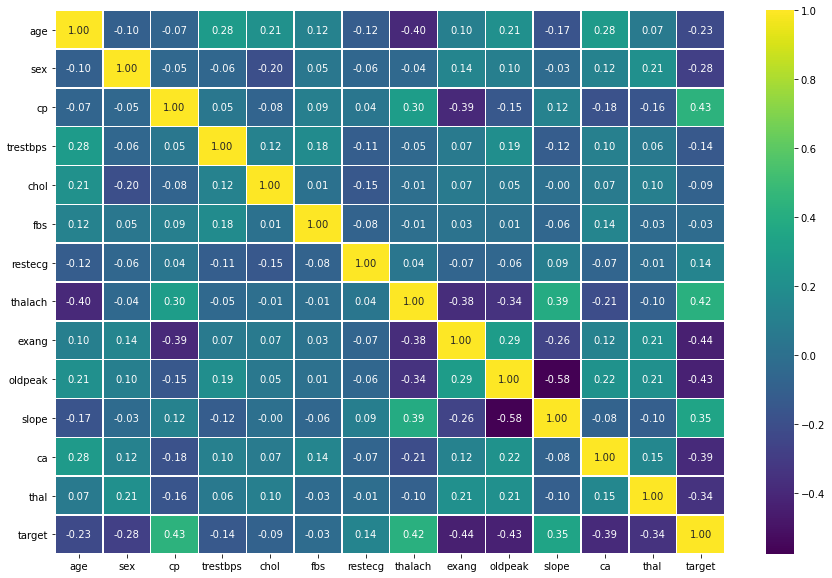

In [25]:
# Heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="viridis");
# this is for older versions where the heatmap isnt full at the top and bottom
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5 , top - 0.5)

In [26]:
# Machine Learning 

# 5. Modelling 

In [27]:
X = df.drop("target",1)
y = df["target"]

In [28]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

In [29]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


# Trying 3 different Machine Learning models
+ Logistic Regression
+ KNearest Neighbors
+ RandomForestClassifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [32]:
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """Fits and evaluates given machine learning models
       Models : a dict of different Scikit-learn machine learning models
       X_train : training data (no labels)
       X-test : testing data (no labels)
       y_train : training labels
       y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [33]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test, 
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparism

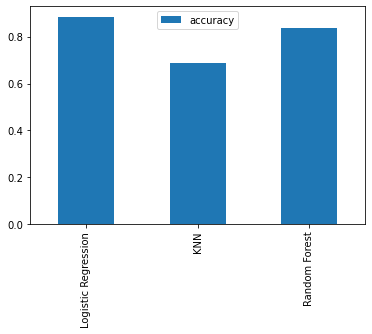

In [34]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

* Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.


* Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?


* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).


* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.


* Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.


* Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.


* F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.


* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.


* ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.


* Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

# Observation : Logistic Regression has the best performance

Now that we have a baseline model.. and we know a model's first predictions arent always what
we should base our next steps off. What should we do?

Let's look at the following 
* Hyperparameter tunning 
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the curve

# Hyperparameter tuning 

In [35]:
# Let's tune KNN

train_scores = []
test_score = []

# create a list of different values for N_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_score.append(knn.score(X_test, y_test))
    

In [36]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


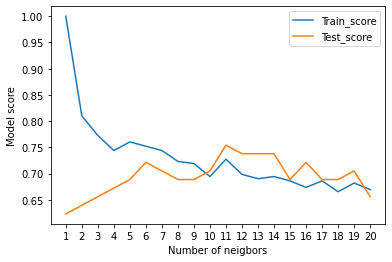

In [38]:
plt.plot(neighbors, train_scores, label="Train_score")
plt.plot(neighbors, test_score, label="Test_score")
plt.xticks(np.arange(1,21,1)) # rearranges the xlabels to show all numbers
plt.xlabel("Number of neigbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

# Observations; Even though we tunned KNN it still didnt get a high performance as the baseline model for Logistic Regression

# Hyperparameter tuning with RandomiseSearchCV

+ LogisticRegression
+ RandomForestClassifier

In [39]:
# create our hyperparameter grid for Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# create a hyperparemeter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
          "max_depth": [None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

# Let's tune the Grids using RandomiseSearchCV

In [40]:
# Tuning Logistic Regression
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter search mdel for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [41]:
# Best Parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
# Checking our score
rs_log_reg.score(X_test, y_test)

0.8852459016393442

# Tuning RandomFroestClassifier

In [43]:
np.random.seed(42)

# setup random hyperparmeter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# find the best parameters

In [45]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
# Evaluate the randomised search RandomForestCLassifier model

In [46]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [47]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Observation : Logistic Regression has the best performance than our tuned RandomForestModel 

# Hyperparameter tunning using GridseearchCV

In [49]:
#### Different hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver":["liblinear"]}

# Setup grid hyperparamter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


In [51]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# Evaluate the GridSearch Logistic Regression
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Observations :
+ Logistic Regression baseline and tunned model had the same performance

# Evaluating our tuned machine learning classifier beyond accuracy
* ROC curve and AUC curve
* COnfusion matrix
* Classification report
* Precision 
* Recall
* F1-score
..and it would be great if cross-validation was used where possible.

In [53]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [54]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

# Plot ROC - curve

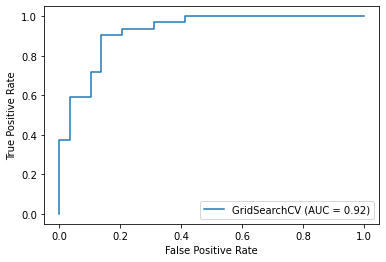

In [56]:
plot_roc_curve(gs_log_reg, X_test, y_test);

# Confusion Matrix

In [57]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


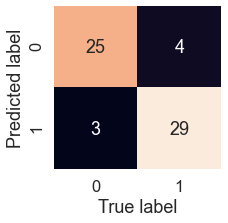

In [59]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """Plots confusion matrix using Seaborn's heatmap"""
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)    

# Classification Report and Cross-validation

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluating metrics using cross-validation using cross-val-score

In [61]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [62]:
# Create a new classifier with best parameters using the results from above
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

# Cross-validated accuracy


In [63]:
cv_acc = cross_val_score(clf, X, y, cv=5 , scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [70]:
cv_acc = np.mean(cv_acc)

# Cross-validated precision


In [64]:
cv_precision = cross_val_score(clf, X, y, cv=5 , scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

# Cross-validated recall


In [65]:
cv_recall = cross_val_score(clf, X, y, cv=5 , scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [66]:
cv_f1 = cross_val_score(clf, X, y, cv=5 , scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

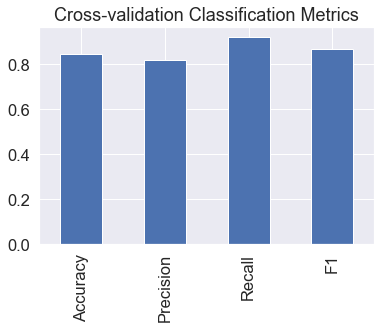

In [71]:
# Visualiza our cross-val metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validation Classification Metrics", legend=False);

# Feature Importance

+ best resource for finding feature importance for all Machine Learning Models
  https://machinelearningmastery.com/calculate-feature-importance-with-python/

+ It is another way of asking which are the most important features contributing to our target

# Fit an instance of LogisticRegression


In [73]:
### finding the best parameters as we used GridsearchCV
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [76]:
clf = LogisticRegression(C = 0.20433597178569418, solver= 'liblinear')

clf.fit(X_train, y_train);

In [77]:
# Check the coefficients
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [78]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

# Visualize feature importance

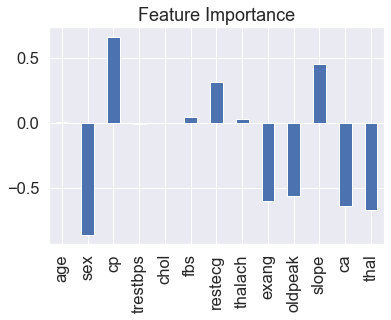

In [79]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
# Sex is negatively corrected with the target

In [80]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
# slope as a positive correlation with the target

In [81]:
pd.crosstab(df["slope"],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Experiment
Well we've completed all the metrics your boss requested. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

But after all this you might be wondering where step 6 in the framework is, experimentation.

Well the secret here is, as you might've guessed, the whole thing is experimentation.

From trying different models, to tuning different models to figuring out which hyperparameters were best.

What we've worked through so far has been a series of experiments.

And the truth is, we could keep going. But of course, things can't go on forever.

So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

Remember we defined one in step 3.

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

In this case, we didn't. The highest accuracy our model achieved was below 90%.

* Could we collect more data?
* could we try more better model? Like CatBoost or XGboost?
* Could we imporve the current models beyond what we have got so far?
* if our model is good enough (we have hit our evaluation metric) how would we export it and 
  share it with others? 